# Week 4 Notebook 3 Subplots and Facets

We have been creating one axes within a single figure. However, we can actually create more than one axes object, or plot, within the figure, to compare patterns between attributes.


In this notebook, we will cover:
- creating subplots with Matplotlib
- using the `FacetGrid` object in Seaborn
- adding titles and text to our plots and subplots

Let's start by importing the libraries and reading in the WIDS datathon data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wids_train = pd.read_csv('wids-climate-train.csv')

We can create subplots using the object-oriented approach in Matplotlib by defining the figure and axes and the number of rows and columns we want to arrange the subplots in.

Calling the `subplots()` method returns the figure object and a tuple for the two axes objects because we want to have the axes in one row and two columns. 

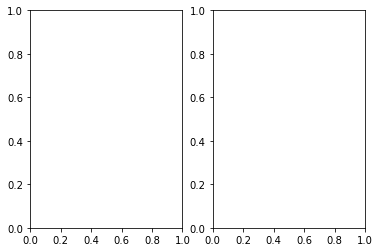

In [5]:
# Create a figure with two subplots, in 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols = 2)

We can refer to the first subplot as `ax1` and the second one as `ax2`, and create our plots as usual - for example:
- create a basic Matplotlib `hist()` to create a histogram in `ax1`
- create a Seaborn boxplot in `ax2`

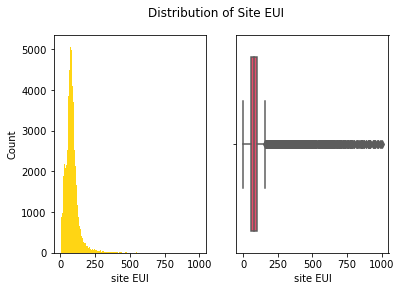

In [6]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1,2)
# basic matplotlib histogram
ax1.hist(wids_train['site_eui'], bins=200, color = "#ffd514" )
ax1.set_xlabel('site EUI')
ax1.set_ylabel('Count')

# seaborn boxplot
sns.boxplot(ax = ax2, data = wids_train, x='site_eui' , color = "#ff355d")
ax2.set_xlabel('site EUI')

fig.suptitle("Distribution of Site EUI")
plt.show()

### Returning arrays of axes

If we specify more than one row and column, we can access the axes using the 2-dimensional array that is returned.

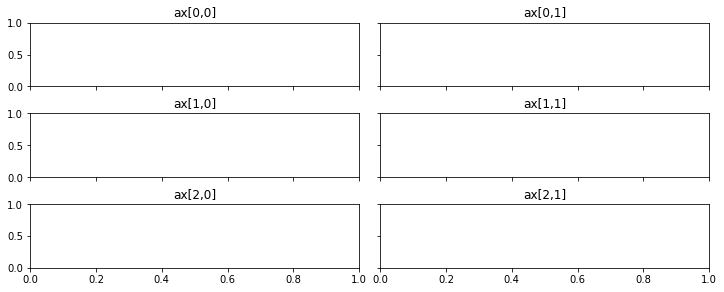

In [7]:
# here's an example of how you refer to each axes object if there is more than one row and col

# change the values of rows and cols and run again
rows = 3   # put a number greater than 1
cols = 2   # try a number greater than 1

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize =(10,4), sharex=True, sharey = True)
for x in range(rows):
    for y in range(cols):
        ax[x,y].set_title('ax['+str(x)+','+str(y)+']')
# put some padding around each subplot so that the titles don't overlap
fig.tight_layout(pad=0.5)

For example, plotting the average january temperatures in the first subplot we would have to refer to the axes as `ax[0,0]`.

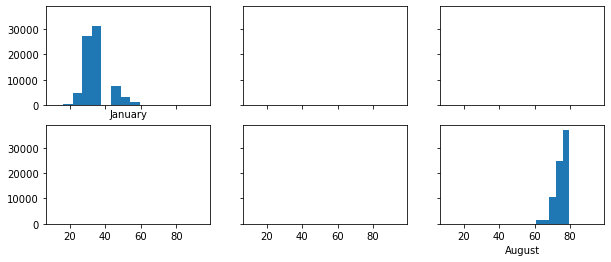

In [8]:
# Create a figure with subplots in 2 rows and 3 columns
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize =(10,4), sharex=True, sharey = True)

# plot for the top left subplot - first row, first col
ax[0,0].hist(wids_train['january_avg_temp'])
ax[0,0].set_xlabel('January')

# plot for the bottom right subplot - 2nd row, 3rd col
ax[1,2].hist(wids_train['august_avg_temp'])
ax[1,2].set_xlabel('August')
plt.show()

### Titles

Each subplot has its own title and x and y label. 

The overall figure can also have a main title, and overall x and y labels, called `suptitle`, `supxlabel`, `supylabel`.


Text(0.5, 0.5, 'Figure Text')

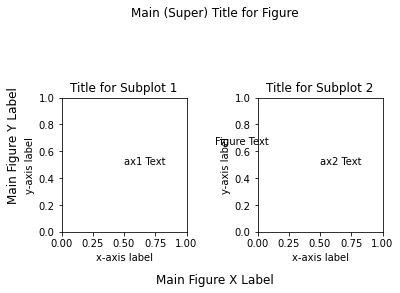

In [9]:
import matplotlib.pyplot as plt
# create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Main (Super) Title for Figure')

# put some padding so that the titles don't overlap - try other numbers to see the difference
fig.tight_layout(pad=4)

# title and labels for first plot
ax1.set_title('Title for Subplot 1')
ax1.set_xlabel('x-axis label')
ax1.set_ylabel('y-axis label')

# title and labels for second plot
ax2.set_title('Title for Subplot 2')
ax2.set_xlabel('x-axis label')
ax2.set_ylabel('y-axis label')

fig.supxlabel("Main Figure X Label")
fig.supylabel("Main Figure Y Label")

# add text annotation to any axes or figure
ax1.text(0.5,0.5, 'ax1 Text')
ax2.text(0.5,0.5, 'ax2 Text')
fig.text(0.5,0.5, 'Figure Text')

In [10]:
wids_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

### Organising Text

Although we can add text to every axes and subplot, we may not need to, as it may make the overall figure too cluttered.

Here is an example where we want to compare the site EUI values across different states based on the year built.
Let's organise the data to choose only those built after 1950 and focus only on State_1, State_2, State_4 and State_6.

In [11]:
# find buildings after 1950 by state, as an example we will show only for four of the states
state1_buildings = wids_train[(wids_train['year_built'] > 1950)&(wids_train['State_Factor']=='State_1')]
state2_buildings = wids_train[(wids_train['year_built'] > 1950)&(wids_train['State_Factor']=='State_2')]
state4_buildings = wids_train[(wids_train['year_built'] > 1950)&(wids_train['State_Factor']=='State_4')]
state6_buildings = wids_train[(wids_train['year_built'] > 1950)&(wids_train['State_Factor']=='State_6')]



**Create Subplots By State**

Using these four data sets, we will make four subplots on the same figure. An array of four axes will be returned by the `subplots()` method, so we can refer to them as with indices from 0 to 3.

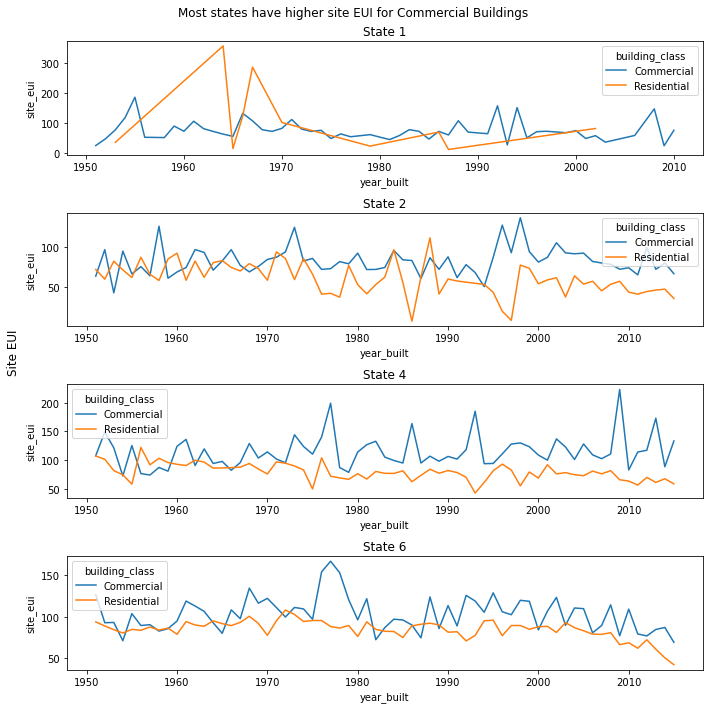

In [12]:
# Organise into four rows and one column
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize=(10,10))

# create four subplots for each of the four states
sns.lineplot(ax = ax[0], data=state1_buildings, x="year_built",y = 'site_eui',hue='building_class', ci=None)
sns.lineplot(ax = ax[1], data=state2_buildings, x="year_built",y = 'site_eui',hue='building_class', ci=None)
sns.lineplot(ax = ax[2], data=state4_buildings, x="year_built",y = 'site_eui',hue='building_class', ci=None)
sns.lineplot(ax = ax[3], data=state6_buildings,  x="year_built",y = 'site_eui',hue='building_class', ci=None)

# give each subplot a title
ax[0].set_title('State 1')
ax[1].set_title('State 2')
ax[2].set_title('State 4')
ax[3].set_title('State 6')

# add a main title
fig.suptitle('Most states have higher site EUI for Commercial Buildings')
    
# add a y-axis label, all subplots measure the site EUI
fig.supylabel('Site EUI')
fig.tight_layout(pad=1)

plt.show()

Generally, looking at the plots we can notice that residential buildings have lower mean site EUI values, after 1970s for States 2, 4 and 6.

However the plot seems to have some issues:
- Consistency:
    - the y-axis for each plot is not consistent, for state 1 the y tick labels are 0 up to 300 but for state 2 they are 50 and 100, so the actual site EUI values can be double those of state 1 but it is not immediately obvious.
    - the legends are sometimes on the right and sometimes on the left
- Redundancy
    - the y- and x-axis labels are the same for each of the subplots 
    - legend colours are also the same so it is not necessary to actually have the legend for each subplot.
    
We can improve on some of these issues quickly by simply having the axes shared.

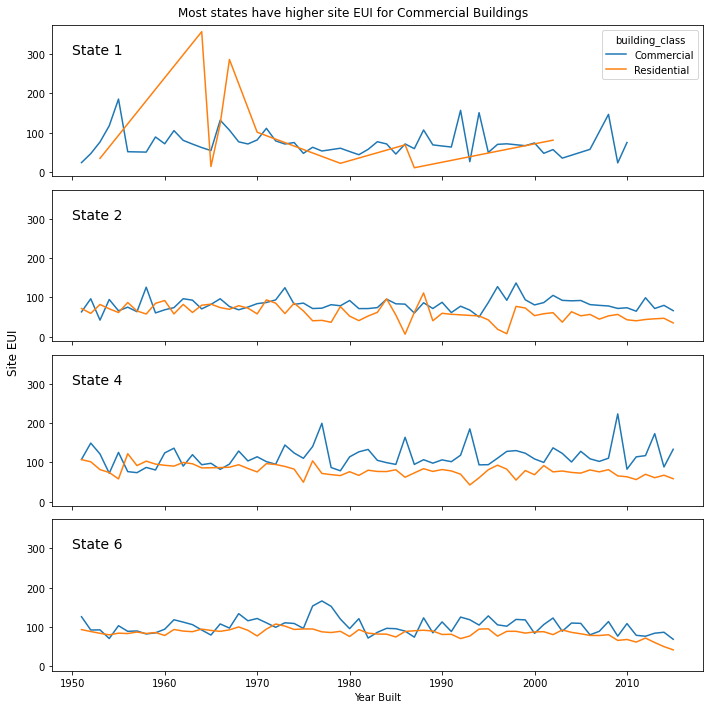

In [13]:
# Create the subplots with shared axes: 
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize=(10,10), sharex=True, sharey=True)

sns.lineplot(ax = ax[0], data=state1_buildings, x="year_built",y = 'site_eui',hue='building_class', ci=None)
sns.lineplot(ax = ax[1], data=state2_buildings, x="year_built",y = 'site_eui',hue='building_class', ci=None, legend=False)
sns.lineplot(ax = ax[2], data=state4_buildings, x="year_built",y = 'site_eui',hue='building_class', ci=None, legend=False)
sns.lineplot(ax = ax[3], data=state6_buildings,  x="year_built",y = 'site_eui',hue='building_class', ci=None, legend=False)

# Add text to the plot instead of titles
ax[0].text(1950, 300, 'State 1', fontsize=14)
ax[1].text(1950, 300, 'State 2', fontsize=14)
ax[2].text(1950, 300, 'State 4',fontsize=14 )
ax[3].text(1950, 300, 'State 6', fontsize=14)

# Label only the bottom x axis
ax[3].set_xlabel('Year Built')

# suppress y labels for all 
for a in ax:
    a.set_ylabel('')

# use the figure Y-label instead
fig.supylabel('Site EUI')

# Add a main title 
fig.suptitle('Most states have higher site EUI for Commercial Buildings')
fig.tight_layout(pad=1)

plt.show()

## FacetGrid with Seaborn

Another way to create subplots is to create facets.

Seaborn uses the FacetGrid class to create subplots according to the structure of the dataset.

Each facet is used to represent one categorical variable in the data set.

For example, we can create a FacetGrid object where each column will represent one building class.
Seaborn will automatically determine the number of columns to create based on the nmber of levels of `building_class`.

Then we map the type of plot that we want to use to the facets, and the variable to be plotted. Here we will plot the energy star rating. 

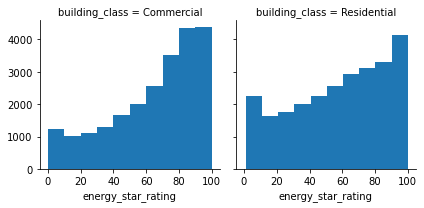

In [14]:
# Create the facet grid - it's already a subplot, so no need to call the subplots() method
ax = sns.FacetGrid(wids_train, col='building_class')
ax.map(plt.hist, 'energy_star_rating')               # plot histograms of energy star rating for each facet
plt.show()

### Facet Dimensions

Facets should use categorical variables, so that the number of rows and columns is a discrete value matching the number of levels in the categories.

Let's add the `State_Factor` as the rows to the energy star rating facet grid.

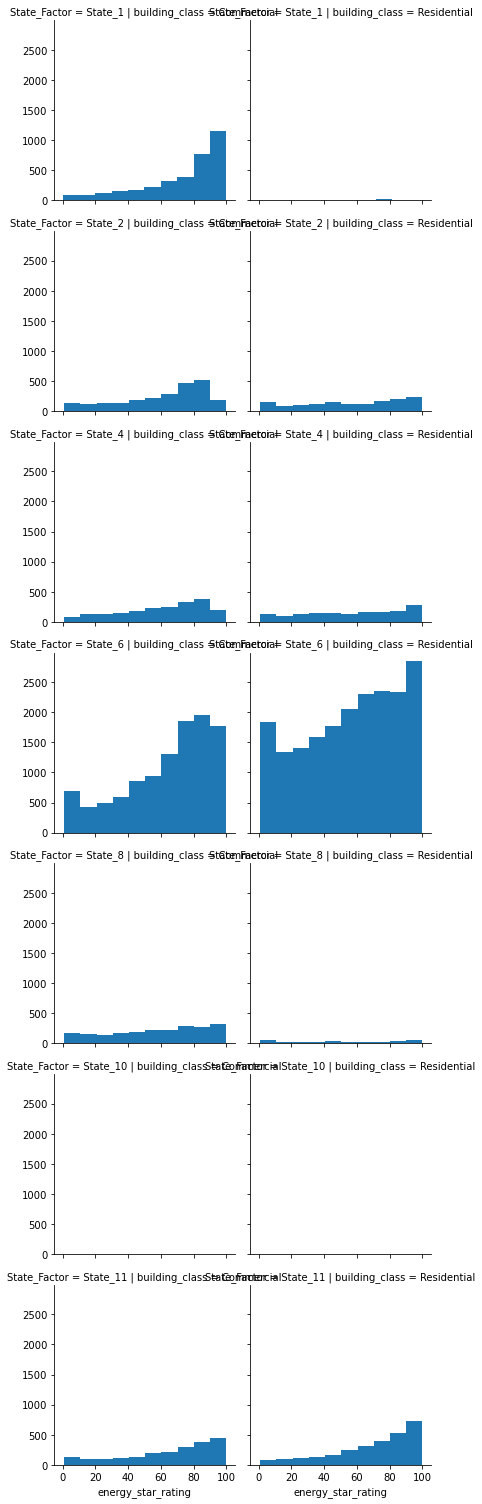

In [15]:
# Create the facet grid to compare energy star rating for each building class by state
graph = sns.FacetGrid(wids_train, row = 'State_Factor', col='building_class')
graph.map(plt.hist, 'energy_star_rating')               # plot histograms of energy star rating for each facet
plt.show()

**Margins and Sizing**

As you can see there is some overlap of the facet titles. Instead of using only one title at the top for each facet, we can set `margin_titles = True` so that they appear at the row and column.
 
 We can also adjust the size of each facet using the `height` and `aspect` parameters.
 

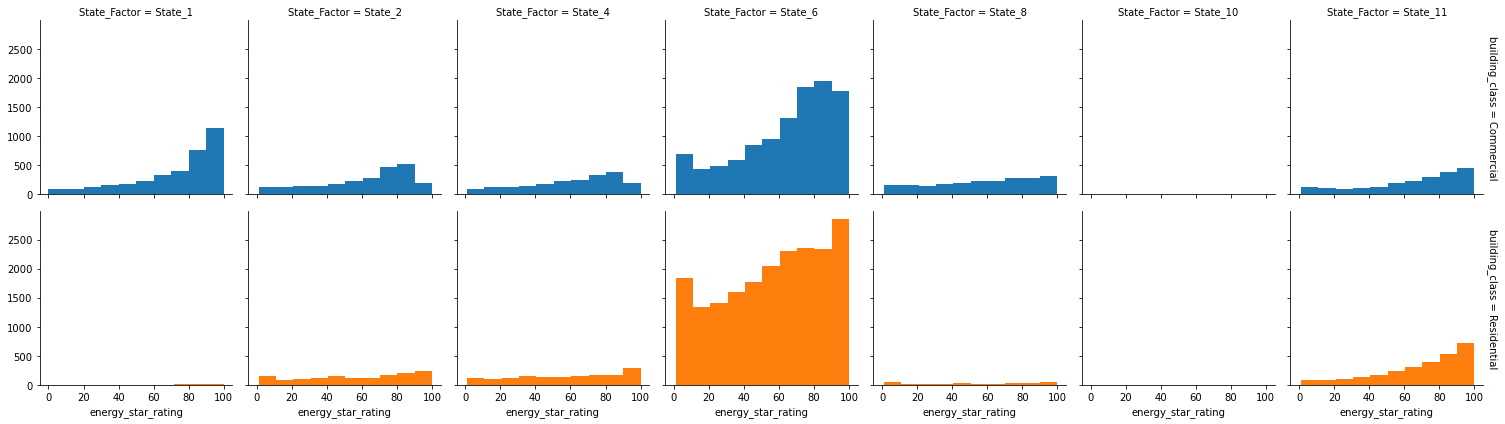

In [16]:
# Create the facet grid to compare energy star rating for each building class by state
# height and aspect is used to resize the facets
graph = sns.FacetGrid(wids_train, col = 'State_Factor',  row='building_class',hue='building_class', margin_titles=True, height = 3, aspect=1)
graph.map(plt.hist, 'energy_star_rating')               # plot histograms of energy star rating for each facet
plt.show()

**Hue Dimension**

In the figure above the building class is also added to the `hue` argument to distinguish the histograms by colour.

Actually, we can use the `hue` argument to add another dimension to the FacetGrid.
Different colours can be used to represent different category levels. This allow us to compare categories using
- rows
- columns
- colours

For example, we can create a scatterplot of site EUI vs energy star rating for different states and building classes for each year. Let's consider only states 1 and 2.

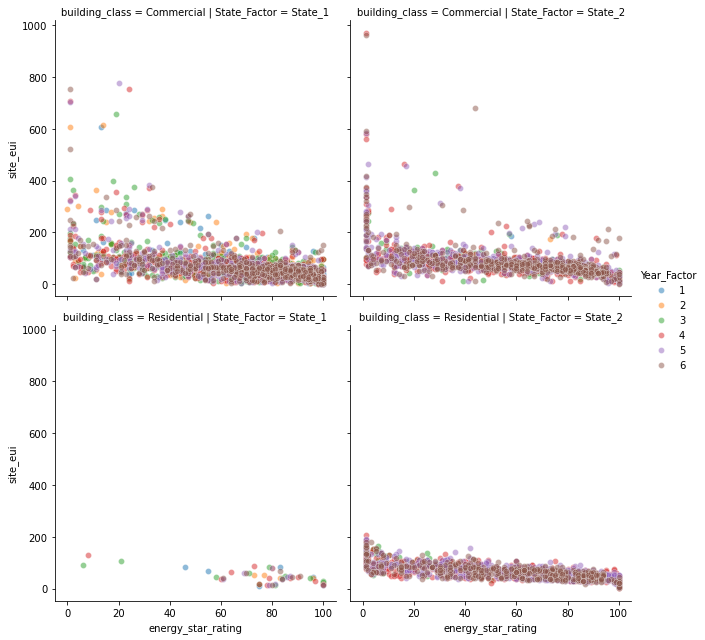

In [17]:
# Example
# Let's get data for year built after 1950, only for states 1, 2.
#temp_data = wids_train[(wids_train['year_built']> 1950)&(wids_train['State_Factor'].isin(['State_1','State_2']))]
temp_data = wids_train[(wids_train['State_Factor'].isin(['State_1','State_2']))]

# temp_data contains only State_Factor 1,2
graph = sns.FacetGrid(temp_data, 
                      row='building_class', 
                      col='State_Factor', 
                      hue='Year_Factor',
                      height=4.5, aspect=1)
graph.map(sns.scatterplot, 
          'energy_star_rating','site_eui', 
          alpha=0.5)

graph.add_legend()
plt.show()


**Summary**

In this notebook, we have used subplots and facets to create plots to compare our data across different categories.
Try out the exercise below to create more plots.

## Exercises

Let's use the `bikes_clean.csv` data set as in the previous notebooks.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

date_cols = ['rental_date','started_at', 'ended_at']
bikes = pd.read_csv('bikes_clean.csv', parse_dates = date_cols, dayfirst=True)
bikes.head()

,ride_id,rideable_type,rental_date,rental_hour,started_at,ended_at,start_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_in_min,day_of_week
0,5A2157D0EC77FF72,classic,2022-01-01,0,2022-01-01 00:04:00,2022-01-01 00:10:00,31241.0,38.905900,-77.032500,38.902760,-77.038630,casual,0 days 00:06:00,6,Saturday
1,19DBFDE1D077F113,electric,2022-01-01,0,2022-01-01 00:05:00,2022-01-01 00:15:00,31202.0,38.913055,-77.031823,38.930000,-77.050000,casual,0 days 00:10:00,10,Saturday
2,1B6B8A705833DCE2,docked,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:47:00,31200.0,38.910100,-77.044400,38.900283,-77.029822,casual,0 days 00:41:00,41,Saturday
3,ED112F28D5F492B8,classic,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:20:00,31288.0,38.890496,-77.017246,38.902400,-77.026220,casual,0 days 00:14:00,14,Saturday
4,6F2C888044490871,classic,2022-01-01,0,2022-01-01 00:06:00,2022-01-01 00:20:00,31288.0,38.890496,-77.017246,38.902400,-77.026220,casual,0 days 00:14:00,14,Saturday


Q1. Create a figure with 2 rows of subplots. The top row should show a Seaborn scatterplot of the `start_lat` and `start_lng` and the bottom row should show a scatterplot of `end_lat` and `end_lng`. Use the `hue` argument to indicate member vs casual users in each.

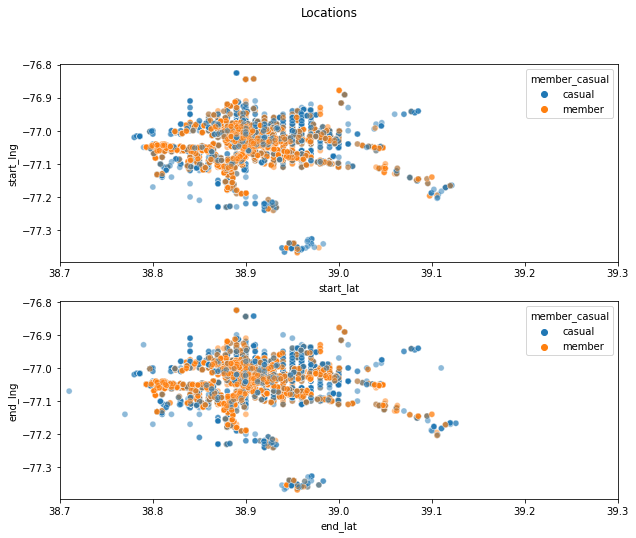

In [20]:
# Q1 Answer

# Create a figure with 2 rows and 1 column of subplots
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize =(10,8))

# First subplot is a Seaborn barplot showing mean duration in minutes for each rideable type
sns.scatterplot(ax=ax1,data = bikes, x = 'start_lat', y = 'start_lng', hue='member_casual', alpha=0.5)
ax1.set_xlim(38.7,39.3)
# Second subplot is a Seaborn lineplot showing mean duration in minutes for rental hours from 0 - 23
sns.scatterplot(ax=ax2,data =bikes, x = 'end_lat', y = 'end_lng', hue = 'member_casual',alpha=0.5)
ax2.set_xlim(38.7,39.3)
fig.suptitle('Locations')
plt.show()


Q2. Create a figure with 2 rows and 2 columns of subplots. 
1. Subplot 1 (top left) should be a boxplot of the duration in minutes, arranged horizontally.
2. Subplot 2 (top right), use Seaborn to create a barplot with the mean duration in minutes for each rideable type.
3. Subplot 3 (bottom left) should be a Seaborn scatterplot comparing the duration in minutes with the rental hour, set the hue to rideable type.
4. Subplot 4 (bottom right), show the line plot of the mean duration over the rental hour for each rideable type.

Add suitable titles and axis labels.

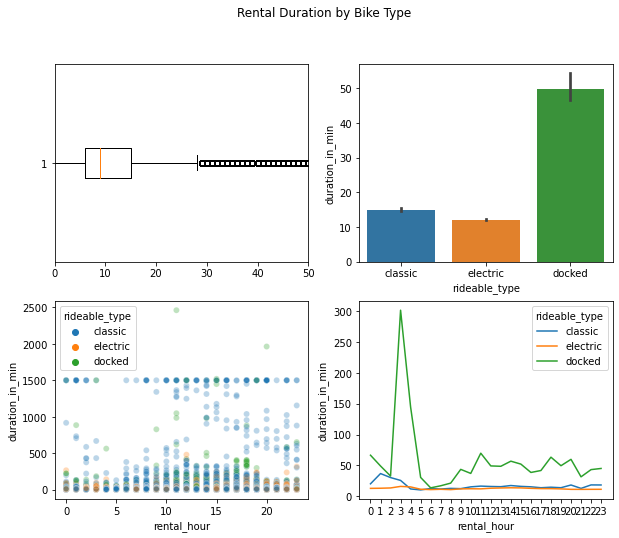

In [21]:
# Q2 Answer

# Create a figure with 2 rows and 1 column of subplots
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize =(10,8))

# First subplot is a boxplot of mean duration in minutes, arranged horizontally
# remember that the axes in the first row and first column is ax[0,0]
ax[0,0].boxplot(bikes['duration_in_min'],vert=False)
ax[0,0].set_xlim(0,50)

# Second subplot is a Seaborn barplot showing mean duration in minutes for each rideable type
sns.barplot(ax=ax[0,1],data = bikes, x = 'rideable_type', y = 'duration_in_min')

# Third subplot is a Seaborn scatterplot  
sns.scatterplot(ax=ax[1,0], data = bikes, x = 'rental_hour', y='duration_in_min', hue='rideable_type', alpha=0.3)

# Last subplot is a Seaborn lineplot showing mean duration in minutes for rental hours from 0 - 23
sns.lineplot(ax=ax[1,1],data =bikes, x = 'rental_hour', y = 'duration_in_min', hue = 'rideable_type', ci=None)
ax[1,1].set_xticks(range(0,24,1))

fig.suptitle('Rental Duration by Bike Type')
plt.show()


### FacetGrid

Q3. Create a Seaborn facet grid to view the mean rental duration for each bike type, by the day of week.

Set the rows to the `member_casual` and the columns to `day_of_week`. 
Then create barplots to show the mean duration in minutes for each `rideable_type` in each facet.

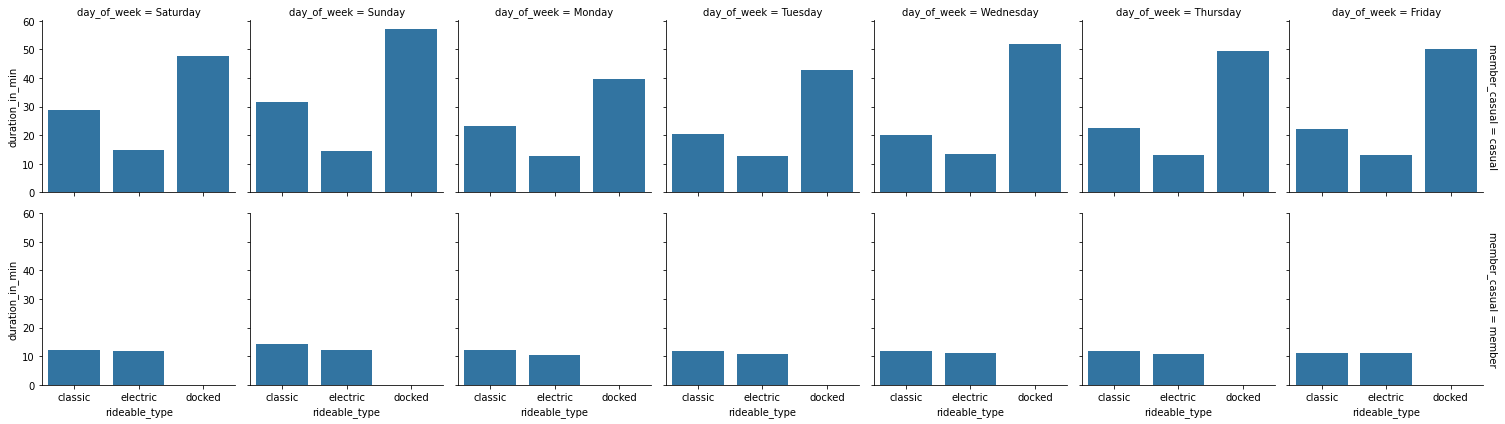

In [22]:
# Q3 Answer
# Facet grid
graph = sns.FacetGrid(bikes, col='day_of_week',row='member_casual',margin_titles=True)
graph.map(sns.barplot,'rideable_type', 'duration_in_min', order=['classic','electric','docked'],ci=None)
plt.show()

Let's calculate the number of rentals for each category: `rideable_type`, `member_casual`, `day_of_week` and `rental_hour`

We will need to group the data for each category and **count** the number of `ride_id`

In [24]:
# create the bike groups and count the total number of ride_ids in each group
bike_groups = bikes.groupby(['rideable_type','member_casual','day_of_week','rental_hour'])['ride_id'].count().reset_index()

# change the ride_id to show the number of rentals
bike_groups.rename(columns={'ride_id':'num_rentals'}, inplace=True)
bike_groups

,rideable_type,member_casual,day_of_week,rental_hour,num_rentals
0,classic,casual,Friday,0,23
1,classic,casual,Friday,1,13
2,classic,casual,Friday,2,9
3,classic,casual,Friday,3,8
4,classic,casual,Friday,4,3
...,...,...,...,...,...
817,electric,member,Wednesday,19,154
818,electric,member,Wednesday,20,107
819,electric,member,Wednesday,21,103
820,electric,member,Wednesday,22,65


**Column Wrapping**

We can create a FacetGrid with columns for the rental hour, with a column wrap value of 6. 

The plot in each facet shows the number of rentals for each rideable type with colour by the member or casual user. 

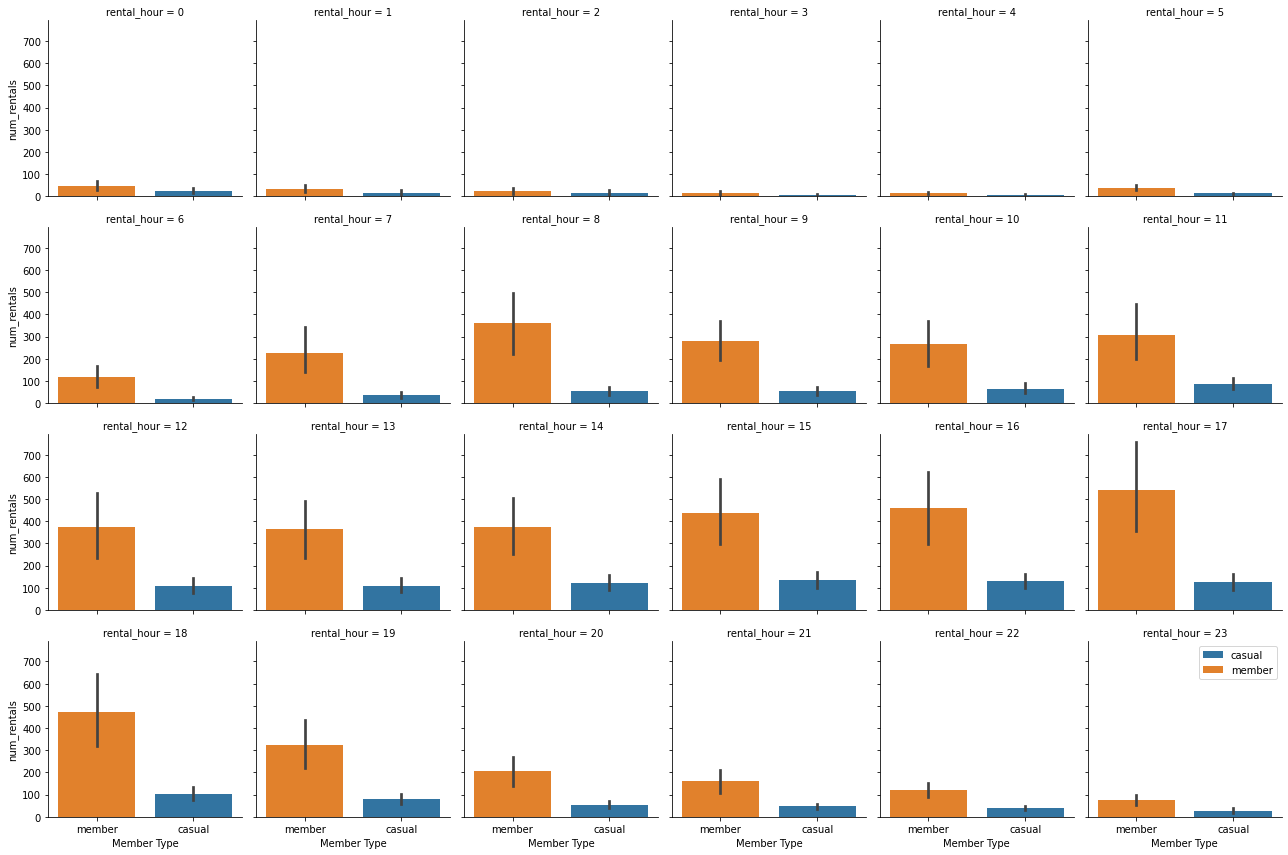

In [25]:
# Using column wrapping
ax = sns.FacetGrid(bike_groups, col='rental_hour', hue='member_casual',col_wrap=6, sharex=True, sharey=True)
ax.map(sns.barplot, 'member_casual','num_rentals',order=['member','casual'])
plt.legend()
ax.set_axis_labels("Member Type")
plt.show()

Q4. Create a FacetGrid with `col='day_of_week` and using column wrapping to automatically create 3 columns in each row.
Each facet should show a lineplot of the ***sum*** of number of rentals from the `bike_groups` data set for each hour.


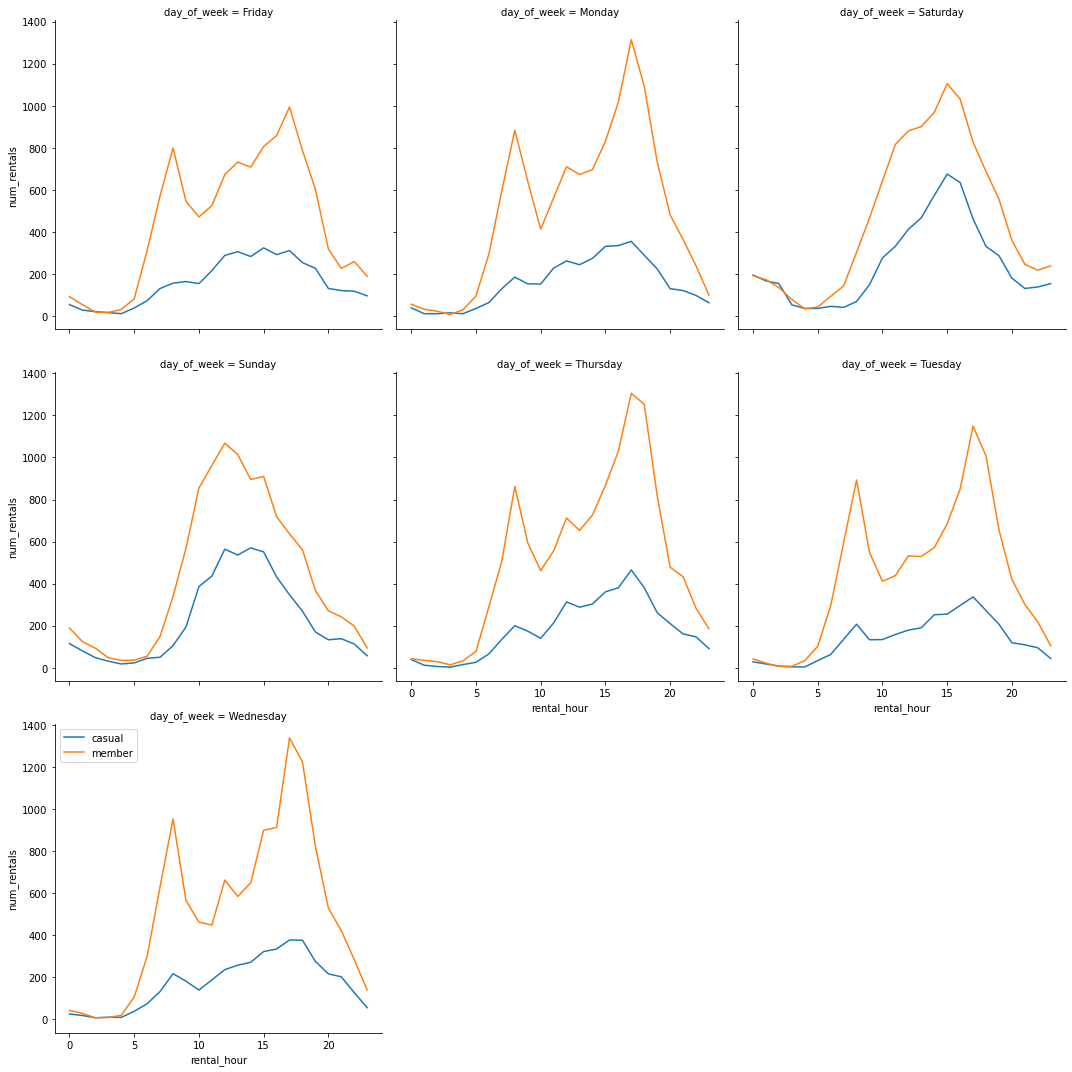

In [26]:
# Q4 Answer
# Using column wrapping
ax = sns.FacetGrid(bike_groups, col='day_of_week', col_wrap=3,hue='member_casual',height=5, aspect=1)
ax.map(sns.lineplot,'rental_hour', 'num_rentals',ci=None, estimator=sum)
plt.legend()
plt.show()